In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos=pd.read_csv(r"C:\Users\usuario\Desktop\Lord Camilo\2022\cursos\Proyectos\Proyecto 4\ds_salaries.csv")

In [3]:
datos.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
datos.drop("Unnamed: 0",axis=1,inplace=True) #eliminar columna Unnamed: 0

In [7]:
datos.info()
#object valores categoricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [9]:
datos.describe(include="all")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [12]:
datos["job_title"].unique()#titulos de los empleos

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

## Visualización de Datos
### Salarios por año

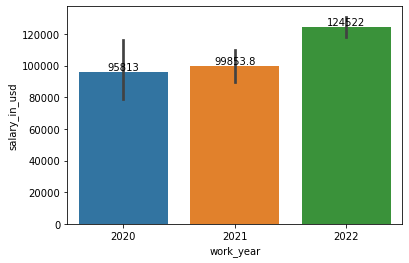

In [16]:


ax=sns.barplot(data=datos,x="work_year",y="salary_in_usd")
ax.bar_label(ax.containers[0])#coloca el valor de los salarios
plt.show()

### Salarios promedios por paises que ofrecen empleo

In [ ]:
datos.groupby(by="company_location").mean()

In [31]:
Salario_Pais=datos.groupby(by="company_location")["salary_in_usd"].mean().reset_index().sort_values(by="salary_in_usd",ascending=False)
Salario_Pais["salary_in_usd"]=Salario_Pais["salary_in_usd"]/1000 #dejar mas pequeño los salarios
filtro=Salario_Pais["salary_in_usd"]>99.84
salario_pais=Salario_Pais[filtro]

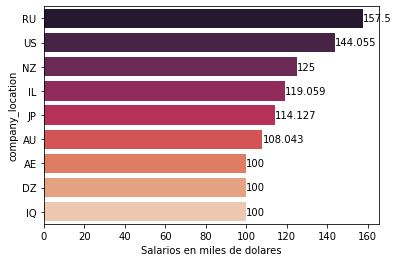

In [40]:
#plt.figure(figsize=(10,15)) #tamaño
ax=sns.barplot(data=salario_pais,y="company_location",x="salary_in_usd",palette="rocket")
ax.bar_label(ax.containers[0])
ax.set_xlabel("Salarios en miles de dolares") # x
plt.show()

## Paises que mas ofrecen emplei en cada año

In [42]:
pais_anio=datos[["work_year","company_location"]]

In [43]:
#crear columna de fre"cuencia
cuenta=pd.DataFrame({"cuenta":np.ones(607)})

In [45]:
#unir
pais_anio1=pais_anio.join(cuenta)
pais_anio1

,work_year,company_location,cuenta
0,2020,DE,1.0
1,2020,JP,1.0
2,2020,GB,1.0
3,2020,HN,1.0
4,2020,US,1.0
...,...,...,...
602,2022,US,1.0
603,2022,US,1.0
604,2022,US,1.0
605,2022,US,1.0


In [51]:
pais_anio=pd.pivot_table(pais_anio1,index=["work_year","company_location"],values="cuenta",aggfunc=np.sum).reset_index()

In [52]:
pais_anio

,work_year,company_location,cuenta
0,2020,AE,1.0
1,2020,AT,2.0
2,2020,CA,1.0
3,2020,CN,1.0
4,2020,DE,7.0
...,...,...,...
82,2022,NL,1.0
83,2022,PK,1.0
84,2022,PL,1.0
85,2022,PT,2.0


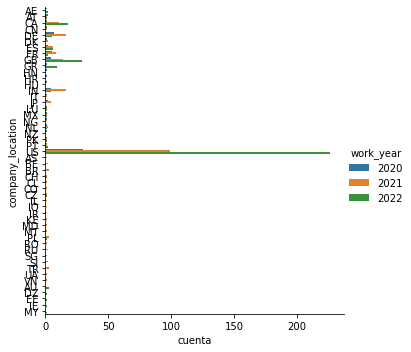

In [57]:
sns.catplot(data=pais_anio,y="company_location",x="cuenta",hue="work_year",kind="bar")#hue es separacion